# Handwritten Digits Recognition

<img src="Handwritten_digit_imge.png" width="">

# Contents

* PROBLEM STATMENT
* DOMAIN ANALYSIS REPORT
* IMPORTING DATASET
* DATA ANALYSIS REPORT
* VISUALIZING THE FIRST 36 TRAINING IMAGES
* RESCALING THE IMAGES
* BREAKING INTO TRAINING, TESTING AND VALIDATION SET
* DEFINING THE NEURAL NETWORK
* DEFINE THE MODEL ARCHITECTURE
* COMPILE THE MODEL 
* TRAIN THE MODEL
* LOAD THE MODEL WITH BEST VALIDITY ACCURACY
* VISUALIZE SOME PREDICTION
* EVALUATE ACCURACY
  - CNN
  - Support Vector Machine
  - Logistic Regression
  - K-Nearest Neighbor
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - Xtreme Gradient Boost
* MODEL COMPARISION REPORT
* CHALLENGES FACED
* CONCLUSION

# Problem Statement

##### Task 1:-Prepare a complete data analysis report on the given data.

##### Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

##### Task3:- Compare between various models and find the classifier that works better.


# Domain Analysis Report

##### Domain:
Handwritten Digit Recognition
##### Importance: 
Essential for automating data entry and improving accessibility.
##### Dataset: 
MNIST, among others, containing grayscale images of digits (0-9).
##### Size: 
Thousands of labeled samples with pixel values and varying handwriting styles.
##### Task: 
Recognize and classify handwritten digits using supervised learning.
##### Challenges: 
Variability in handwriting styles, noise, and limited data for specific classes.
##### Approaches: 
Traditional methods, machine learning (SVM, k-NN), and deep learning (CNNs).
##### State of the Art: 
Ongoing advancements in deep learning architectures.
##### Applications: 
Widely used in postal automation, bank check processing, and document digitization.
##### Future Directions: 
Explore emerging technologies, address challenges, and identify opportunities for improvement.

In [20]:
# Importing the required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
from tensorflow.keras.datasets import mnist

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

60000: This indicates that there are 50,000 images in the dataset.

28: This represents the height of each image in pixels.

28: This represents the width of each image in pixels.

* The no. of channels are not specified so we will take it as grayscale.

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

* The uint8 data type stands for "unsigned 8-bit integer," which means that each pixel value in the image is an integer ranging from 0 to 255.

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

* y_train & y_test contains the numbers from 0 to 9 indicating the output of the images and specifying which image is indicating which digit.

In [14]:
# Print the exact counts
value_counts = np.bincount(y_train)
for digit, count in enumerate(value_counts):
    print(f"Digit {digit}: {count} occurrences")

Digit 0: 5923 occurrences
Digit 1: 6742 occurrences
Digit 2: 5958 occurrences
Digit 3: 6131 occurrences
Digit 4: 5842 occurrences
Digit 5: 5421 occurrences
Digit 6: 5918 occurrences
Digit 7: 6265 occurrences
Digit 8: 5851 occurrences
Digit 9: 5949 occurrences


* We can see the occurrence of the label values in our dataset.
* Digit 1 has occured the most.

# Data Analysis Report
The MNIST dataset comprises 28x28 grayscale images of handwritten digits (0-9), with 60,000 training and 10,000 testing samples. It is commonly used for digit recognition tasks. Exploratory data analysis reveals a balanced distribution of digits, and visual inspection showcases the diversity in writing styles. The dataset is well-suited for training and evaluating machine learning models for image classification.

# Visualize the first 36 Training images

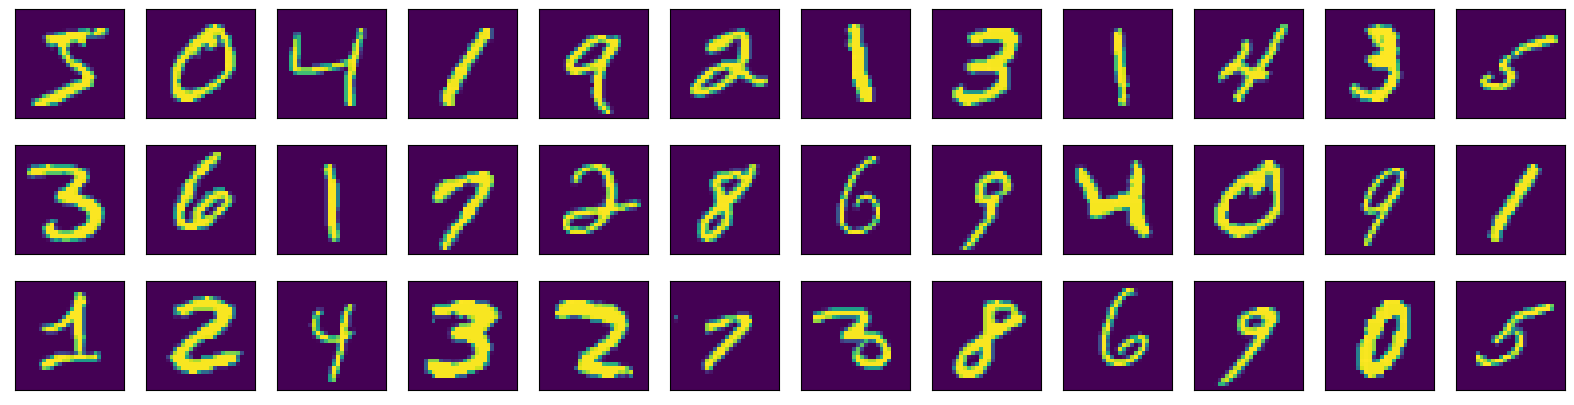

In [4]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

* We can see that the MNIST dataset contains the images of the digits and we need to make a model which image specify which digit.

# Rescale the Images by Dividing Every Pixel in Every Image by 255

In [16]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [18]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

* When you rescale the pixel values by dividing them by a constant (e.g., 255.0), the data type of the array changes from uint8 to float32 or another floating-point type, depending on the specific rescaling factor used. This is because the result of the division is a floating-point number, even if the original pixel values were integers.

# Break Dataset into Training, Testing, and Validation Sets

In [6]:
from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train, num_classes=None)
y_test = keras.utils.to_categorical(y_test, num_classes=None)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28)
55000 train samples
10000 test samples
5000 validation samples


# Defining the Neural Network

<img src="Handwritten_digit_7.PNG" width="">

# Define the Model Architecture 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

# Compile the Model 

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model 

In [20]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Epoch 1/10
1716/1719 [============================>.] - ETA: 0s - loss: 0.1914 - accuracy: 0.9382
Epoch 1: val_loss improved from inf to 0.05890, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 28s 15ms/step - loss: 0.1912 - accuracy: 0.9382 - val_loss: 0.0589 - val_accuracy: 0.9828
Epoch 2/10
1719/1719 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9783
Epoch 2: val_loss improved from 0.05890 to 0.03797, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0380 - val_accuracy: 0.9898
Epoch 3/10
1718/1719 [============================>.] - ETA: 0s - loss: 0.0550 - accuracy: 0.9834
Epoch 3: val_loss improved from 0.03797 to 0.03246, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0325 - val_accuracy: 0.9900
Epoch 4/10
1716/1719 [=======

# Load the Model with the Best Validation Accuracy

In [9]:
model.load_weights('model.weights.best.hdf5')

# Visualize Some Predictions

In [10]:
# get predictions on the test set
y_hat = model.predict(x_test)

mnist_labels = ['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

313/313 [==============================] - 3s 7ms/step


In [11]:
x_test.shape

(10000, 28, 28)

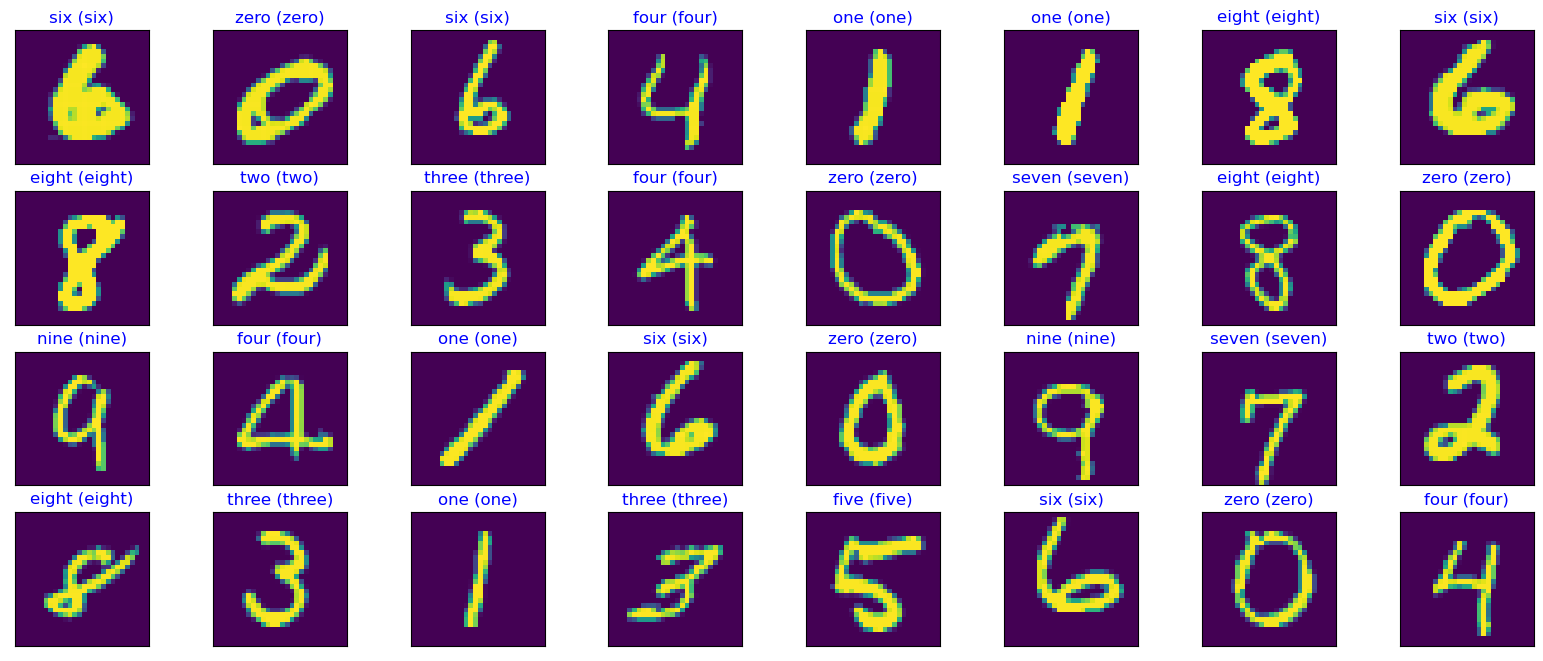

In [24]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# Evaluate Accuracy

# CNN

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.5f%%' % accuracy)

[0.025303682312369347, 0.9929999709129333]
Test accuracy: 99.30000%


# Support Vector Machine

In [30]:
# Reshape the images to a 2D array (flatten)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert them to single-column labels
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Create the SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  93.93 %
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.90      0.93      0.92      1010
           4       0.93      0.96      0.95       982
           5       0.92      0.91      0.91       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.90      0.91       974
           9       0.95      0.90      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  92.65 %
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# K-Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  97.0 %
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  87.47 %
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       980
           1       0.94      0.96      0.95      1135
           2       0.86      0.85      0.86      1032
           3       0.83      0.86      0.84      1010
           4       0.88      0.86      0.87       982
           5       0.83      0.82      0.82       892
           6       0.89      0.89      0.89       958
           7       0.90      0.89      0.89      1028
           8       0.84      0.82      0.83       974
           9       0.85      0.86      0.85      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Randon Forest Algorithm

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  87.26 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.84      0.85      0.85      1010
           4       0.87      0.86      0.86       982
           5       0.82      0.83      0.82       892
           6       0.90      0.89      0.89       958
           7       0.89      0.89      0.89      1028
           8       0.82      0.82      0.82       974
           9       0.84      0.84      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Gradient Boosting Algorithm

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  94.74000000000001 %
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.94      0.93      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.93      0.94       892
           6       0.97      0.95      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.91      0.93      0.92       974
           9       0.92      0.93      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# XGBoost Algorithm

In [36]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x_train_flat, y_train_single)

# Make predictions on the test set
y_pred = clf.predict(x_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test_single, y_pred)
print("Accuracy : ",accuracy*100,"%")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_single, y_pred))

Accuracy :  97.83 %
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Model Comparison Report

* CNN :- 99.30 %


* Logistic Regression :- 92.65 %


* Support Vector Machine :- 93.93 %


* K-Nearest Neighbor :- 97.00 %


* Decision Tree Classifier :- 87.47 %


* Random Forest Classifier :- 87.26 %


* Gradient Boosting :- 94.74 %


* XGBoost :- 97.83 %


##### The best accuracy is given by the CNN (Convolution Neural Network) i.e. 99.30 %

# Challenges Faced
Challenges in the MNIST dataset include its simplicity, as it may not fully represent the complexity of real-world image recognition tasks. The dataset's small image size and lack of variations in writing styles can make it less challenging for advanced models. Additionally, MNIST's prevalence has led to overfitting issues, where models may perform exceptionally well on MNIST but struggle with more diverse datasets.

# Conclusion
The MNIST dataset demonstrates the superiority of Convolutional Neural Networks (CNNs) over traditional machine learning models such as logistic regression, k-Nearest Neighbors (k-NN), and Support Vector Machines (SVMs). The exceptional accuracy of the CNN, reaching 99.30%, underscores the effectiveness of deep learning architectures in capturing intricate patterns and spatial relationships within handwritten digits. This result emphasizes the significance of leveraging specialized neural network structures for image classification tasks, showcasing the remarkable performance gain achievable with CNNs on the MNIST dataset.

# Thank you for taking the time to review this project.

Best regards,

Vinay D Gaikwad